In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dxf_parsing.parsing import get_contour_from_dxf
from dxf_parsing.compressing import filter_points_duplicates, points_sequence_to_lines
from dxf_parsing.utils import get_contour_size, move_to_00
from tqdm.notebook import tqdm

In [16]:
path = '/data/detail_price/dxf_хпц/dxf_ХПЦ_ТВЗ/'

In [17]:
dxfs = os.listdir(path)
dxfs = list(filter(lambda s: s.lower().endswith('.dxf'), dxfs))
len(dxfs)

74742

In [19]:
records = []
problemed_files = []

for file in tqdm(dxfs):
    try:
        dxf = get_contour_from_dxf(path + file)
        initial_length = dxf.shape[0]
        dxf = filter_points_duplicates(points_sequence_to_lines(dxf))
        dxf = move_to_00(dxf)

        length = dxf.shape[0]
        w, h = get_contour_size(dxf)
        records.append((file, length, initial_length, w, h))
    except Exception as e:
        with open('problemed_dxfs.log', 'a') as f:
            f.write('%s %s\n' % (file, str(e)))

In [20]:
df = pd.DataFrame.from_records(records, columns='filename length initial_length width height'.split())
df.head()

,filename,length,initial_length,width,height
0,GF19-103.dxf,3,912,418,39
1,TK9925-0060.01.032spripusk.dxf,255,2054,33,771
2,7600.40.01.604.dxf,222,1873,494,553
3,4495.50.20.021.dxf,105,1340,470,201
4,4514.36.00.098.dxf,78,744,372,39


In [21]:
df.to_csv('/data/detail_price/dxf_хпц/dxf_contours_info.csv', index=False)

In [22]:
len(df)

74362

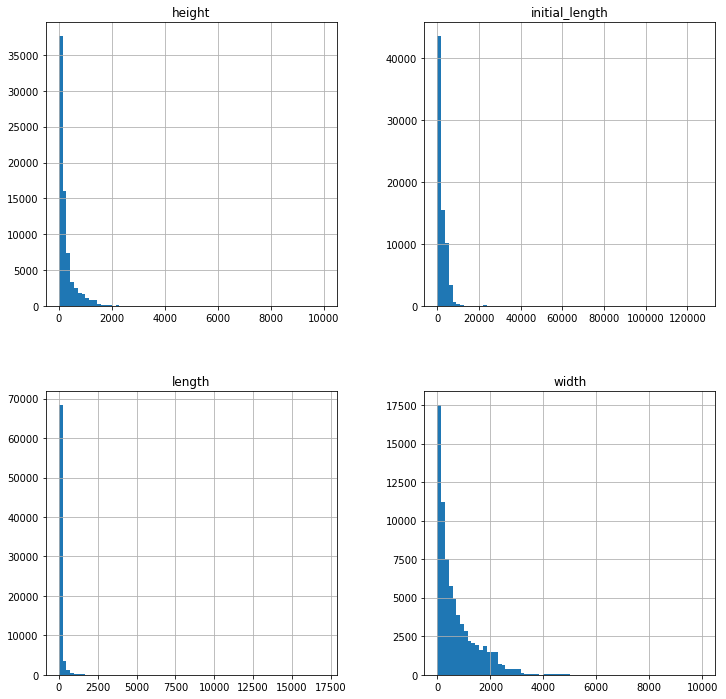

In [30]:
_ = df.hist(bins=70, figsize=(12, 12))

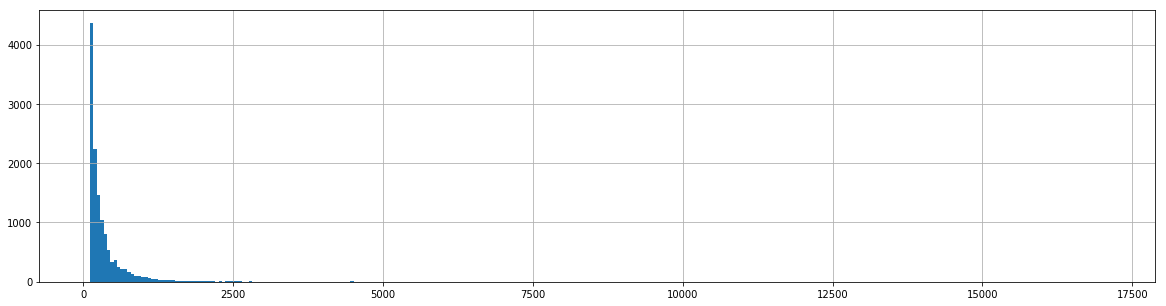

In [35]:
df[df.length > 110].length.hist(figsize=(20, 5), bins=300)

In [37]:
len(df[df.length>100])/len(df)

0.192208386003604